# Sales Prediction Using Regression 

#### Samuel Mendez


In this notebook, I will create a machine learning model to predict the number of sales a company will have based on the amount of money they have invested in different advertising campaigns. 

#### Metadata
Explore the dynamics of advertising impact on product sales with this synthesized dataset. Created using Python programming language, the dataset comprises seven columns representing advertising costs on various platforms.  
* `TV`  
* `Billboards`   
* `Google Ads`  
* `Social Media`  
* `Influencer Marketing`  
* `Affiliate Marketing`
     
The last column, `Product_Sold` quantifies the corresponding number of units sold. This dataset is designed for analysis and experimentation, allowing you to delve into the relationships between different advertising channels and the resulting product sales. Gain insights into marketing strategies and optimize your approach using this comprehensive, yet user-friendly dataset.

In [1]:
# import pakages
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# suppress all warnings
warnings.filterwarnings('ignore')

In [2]:
# import csv
data = pd.read_csv('Advertising_Data.csv')

In [3]:
data.head()

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
0,281.42,538.80,123.94,349.30,242.77,910.10,7164.0
1,702.97,296.53,558.13,180.55,781.06,132.43,5055.0
2,313.14,295.94,642.96,505.71,438.91,464.23,6154.0
3,898.52,61.27,548.73,240.93,278.96,432.27,5480.0
4,766.52,550.72,651.91,666.33,396.33,841.93,9669.0


In [4]:
# change the column headers to snake case

data.columns = [col.lower() for col in data.columns]
print(data.columns)

Index(['tv', 'billboards', 'google_ads', 'social_media',
       'influencer_marketing', 'affiliate_marketing', 'product_sold'],
      dtype='object')


### Exploratory Data Analysis

In [5]:
# view number of samples and columns
data.shape

(300, 7)

In [6]:
# check for duplicates
data.duplicated().sum()

0

In [7]:
# check for missing values
data.isnull().sum()

tv                      0
billboards              0
google_ads              0
social_media            0
influencer_marketing    0
affiliate_marketing     0
product_sold            0
dtype: int64

In [8]:
# view descriptive statistics of the data
data.describe()

,tv,billboards,google_ads,social_media,influencer_marketing,affiliate_marketing,product_sold
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,517.431000,502.644933,512.444133,489.800100,465.732567,484.430633,7031.523333
std,288.114792,275.842369,285.422376,273.883915,288.314080,277.955458,1703.614951
min,1.040000,3.630000,14.860000,11.690000,0.770000,6.740000,2259.000000
25%,273.090000,277.912500,250.530000,265.612500,214.480000,267.677500,5922.500000
50%,513.970000,533.020000,528.965000,486.385000,480.355000,451.315000,7051.000000
75%,774.275000,745.005000,763.345000,695.117500,703.092500,721.065000,8278.000000
max,998.100000,995.320000,999.230000,996.160000,999.830000,987.580000,12227.000000


In [9]:
# view the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tv                    300 non-null    float64
 1   billboards            300 non-null    float64
 2   google_ads            300 non-null    float64
 3   social_media          300 non-null    float64
 4   influencer_marketing  300 non-null    float64
 5   affiliate_marketing   300 non-null    float64
 6   product_sold          300 non-null    float64
dtypes: float64(7)
memory usage: 16.5 KB


#### Data Visualization

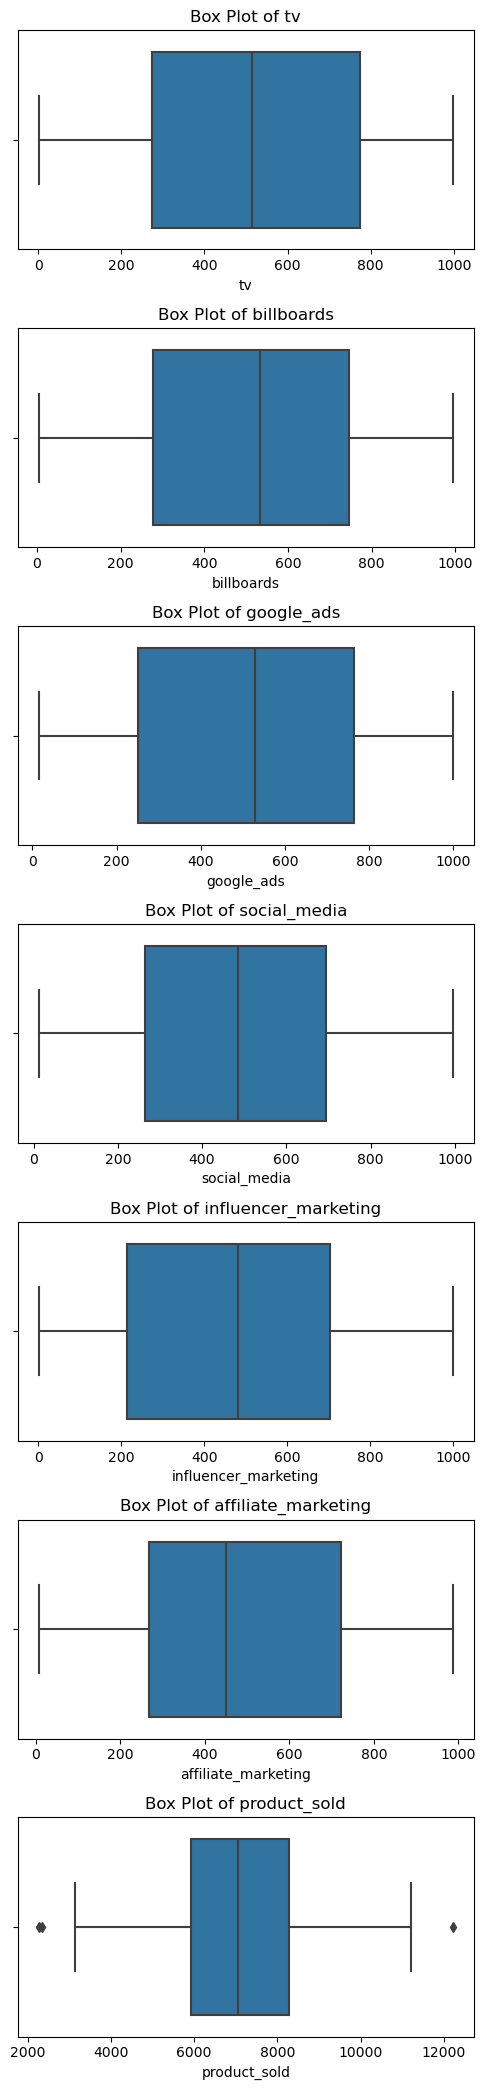

In [10]:
# view the distribution of the data 

num_columns = len(data.columns)
fig, axes = plt.subplots(nrows=num_columns, ncols=1, figsize=(5, 3 * num_columns))

# if there's only one column, axes is not a list, so we need to handle it separately
if num_columns == 1:
    axes = [axes]

# create a box plot for each column
for i, column in enumerate(data.columns):
    sns.boxplot(x=data[column], ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')
    axes[i].set_xlabel(column)

# adjust layout to prevent overlapping
plt.tight_layout()

plt.show()

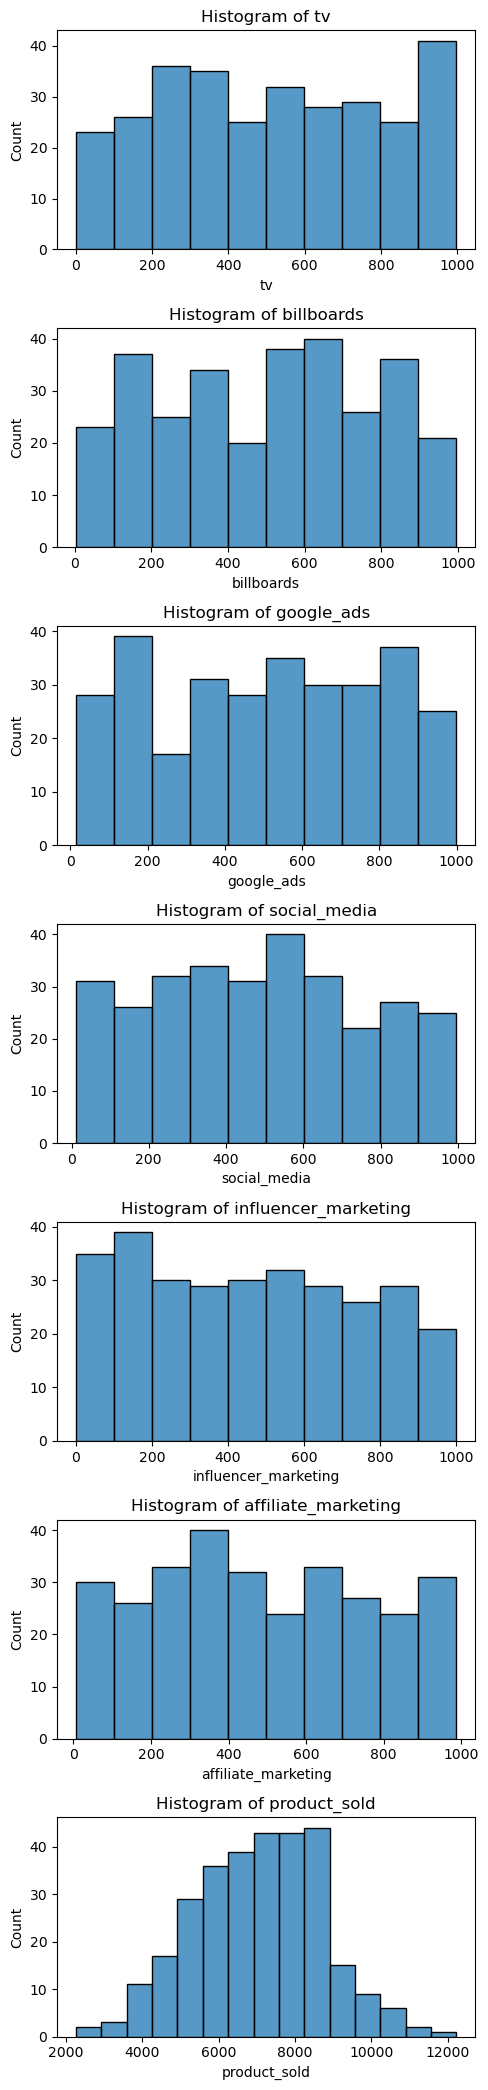

In [11]:
# check for normal distribution

num_columns = len(data.columns)
fig, axes = plt.subplots(nrows=num_columns, ncols=1, figsize=(5, 3 * num_columns))

# if there's only one column, axes is not a list, so we need to handle it separately
if num_columns == 1:
    axes = [axes]

# create a box plot for each column
for i, column in enumerate(data.columns):
    sns.histplot(x=data[column], ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)

# adjust layout to prevent overlapping
plt.tight_layout()

plt.show()

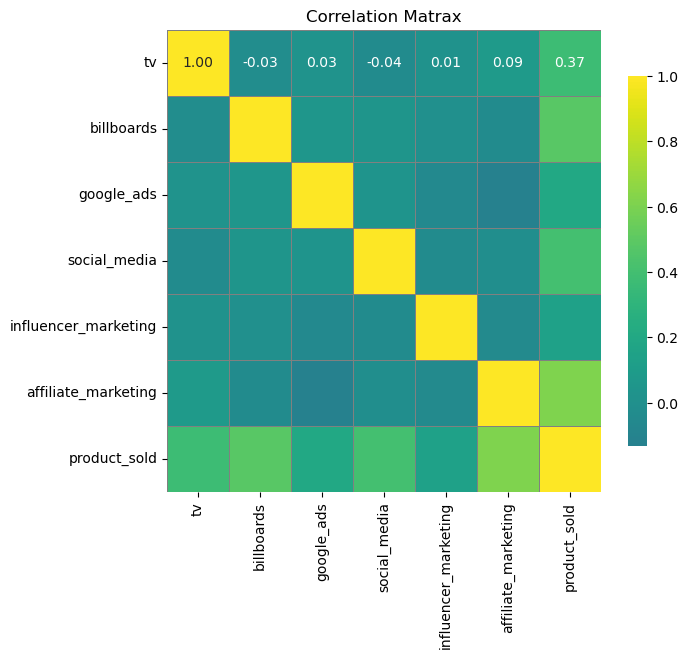

In [12]:
# lets see if there is any strong correlations between the data
corr = data.corr()

plt.figure(figsize = (7,6))

sns.heatmap(
    corr,
    annot=True,
    cmap='viridis',
    center=0,
    linewidth=.5,
    linecolor='gray',
    fmt='.2f',
    cbar_kws={"shrink":.8}
)

plt.title('Correlation Matrax')

plt.show()


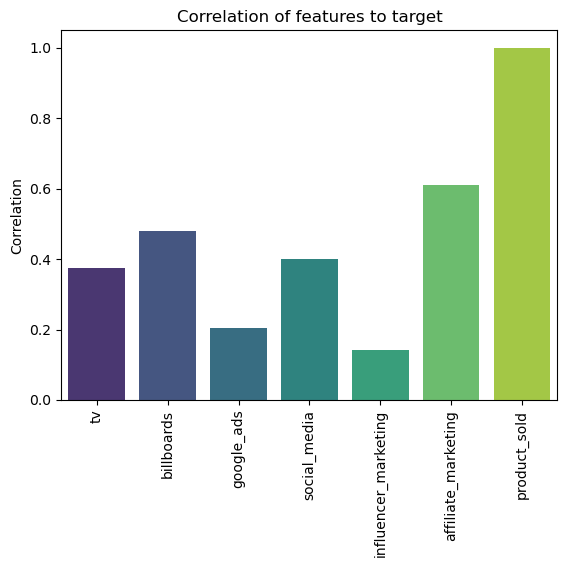

In [13]:
# lets see compare each features correlation to the target
sns.barplot(x=corr['product_sold'].index, y=corr['product_sold'].values, palette='viridis')
plt.xticks(rotation=90)
plt.ylabel('Correlation')
plt.title('Correlation of features to target')

plt.show()

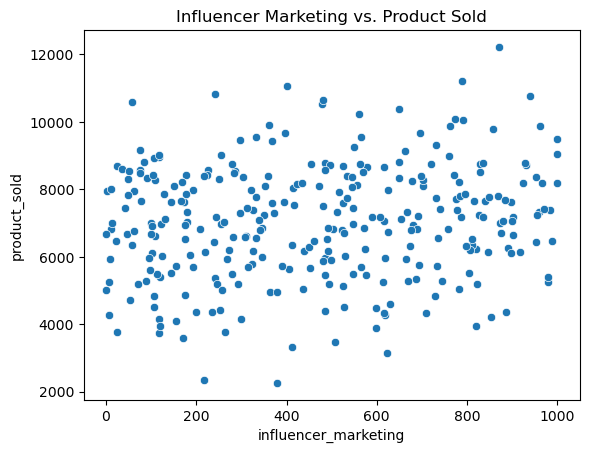

In [14]:
# lets compare influence marketing to products sold 

sns.scatterplot(x='influencer_marketing', y='product_sold', data=data)

plt.title('Influencer Marketing vs. Product Sold')

plt.show()

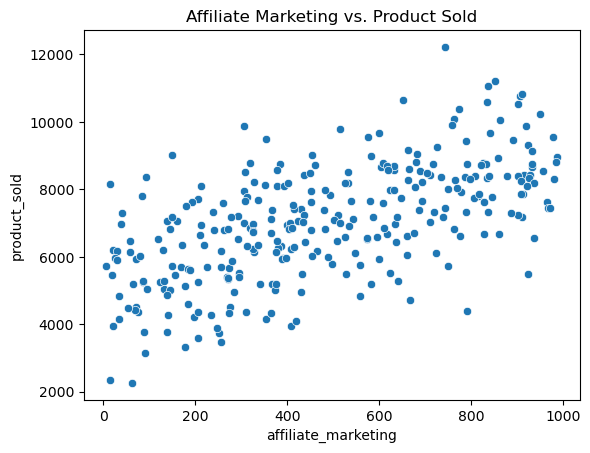

In [15]:
# lets compare affiliate marketing to products sold 

sns.scatterplot(x='affiliate_marketing', y='product_sold', data=data)

plt.title('Affiliate Marketing vs. Product Sold')

plt.show()

### Data Preprocessing

In [16]:
# lets find the outliers to remove them from the data. 
Q1 = data['product_sold'].quantile(0.25)
Q3 = data['product_sold'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['product_sold'] < lower_bound) |  (data['product_sold'] > upper_bound)]

print(outliers)

         tv  billboards  google_ads  social_media  influencer_marketing  \
11   787.33      947.73      884.15        992.30                871.55   
145    1.04       19.68      900.71         55.67                379.03   
281  480.67      135.75       82.66        217.72                217.90   

     affiliate_marketing  product_sold  
11                742.36       12227.0  
145                63.10        2259.0  
281                15.41        2353.0  


Let's drop the data for the outliers in the target.

In [17]:
data = data.drop(outliers.index)

In [18]:
# verify the outliers have been dropped
data.shape

data.reset_index(inplace = True) # reset index

In [19]:
# create features df and target df
features = data.drop('product_sold', axis=1)
target = data['product_sold']

In [20]:
# split the data into training and testing set to scale the features
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = .2, random_state = 42)

In [21]:
# scale the data using minmax since it's mostly uniformly distributed and there are no outliers
scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)

In [22]:
# scale test data
x_test_scaled = scaler.transform(x_test)

### Model Selection

In [23]:
model = {
    'lr': LinearRegression(),
    'rfr': RandomForestRegressor(), 
    'gbr': GradientBoostingRegressor()
}

mse = {}
r2 = {}

for name, model in model.items():
    mse_score = cross_val_score(model, x_train_scaled, y_train, cv = 5, scoring='neg_mean_squared_error')
    mse_scores = -mse_score
    mse[name] = mse_scores.mean()
    r2_scores = cross_val_score(model, x_train_scaled, y_train, cv = 5)
    r2[name] = r2_scores.mean()
    print(f"{name}: MSE CV score: {mse_scores.mean()}")
    print(f"{name}: R2 CV score: {r2_scores.mean()}")


lr: MSE CV score: 111.41454852361605
lr: R2 CV score: 0.9999570170642882
rfr: MSE CV score: 462725.9733959131
rfr: R2 CV score: 0.812571124389683
gbr: MSE CV score: 246550.7580407407
gbr: R2 CV score: 0.9038214329982603


Linear Regression provided higher benchmark metrics so we will move on with this model.


In [24]:
# instantiate object of the model class
lr = LinearRegression()

lr.fit(x_train_scaled, y_train) # fit model to training data

LinearRegression()

### Model Evaluation

In [25]:
# make predictions
preds = lr.predict(x_test_scaled)

In [26]:
# evaluate model

r2 = r2_score(y_test, preds)
mae = mean_absolute_error(y_test, preds)
mse = mean_squared_error(y_test, preds)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 129.7470938244207
Mean Absolute Error: 9.36188503582085
R-squared: 0.9999522520729899


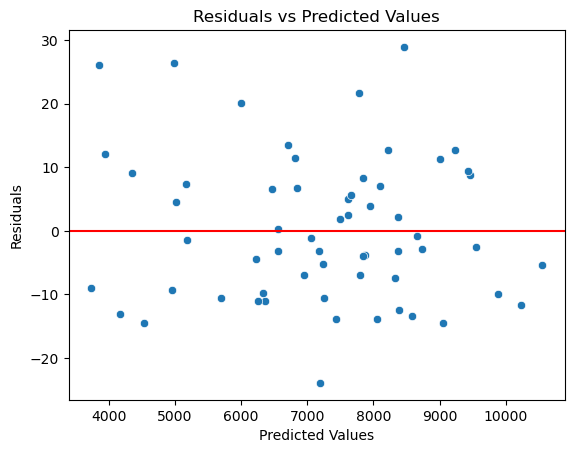

In [27]:
# plot the residuals 
residuals = y_test - preds
sns.scatterplot(x=preds, y=residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

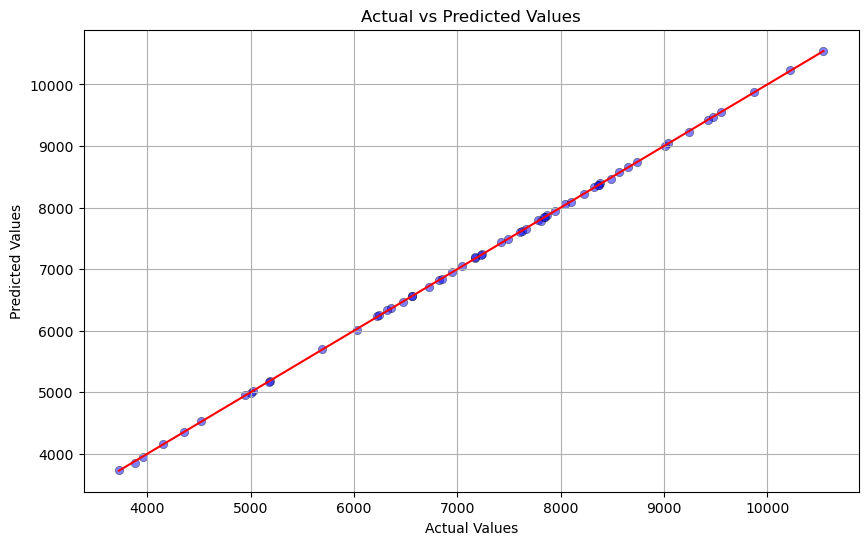

In [28]:
# plot predictions and actual values

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=preds, color='blue', alpha=0.5, edgecolor='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()